In [1]:
import openai
import getpass
import os
from openai import OpenAI
import json
from dotenv import load_dotenv
from langchain_community.document_loaders import TextLoader
from langchain_openai import OpenAIEmbeddings
from langchain_text_splitters import CharacterTextSplitter
from langchain_community.vectorstores import FAISS
from langchain_community.document_loaders import PyPDFLoader
from langchain_community.document_loaders import DirectoryLoader
import matplotlib.pyplot as plt
import tiktoken

In [2]:
load_dotenv()

True

In [3]:
openai_key = os.getenv('OPENAI_API_KEY')
os.environ["OPENAI_API_KEY"] = openai_key
openai.api_key = openai_key

In [6]:
loader = DirectoryLoader('../sources/', glob="**/*.pdf", loader_cls=PyPDFLoader)

In [7]:
docs = loader.load()

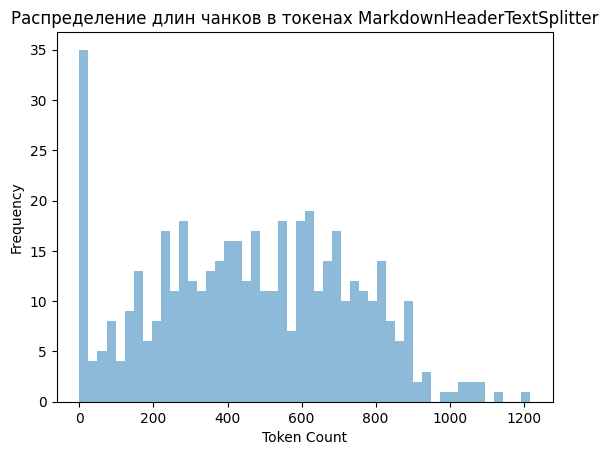

In [8]:
def num_tokens_from_string(string: str, encoding_name: str) -> int:
      """Возвращает количество токенов в строке"""
      encoding = tiktoken.get_encoding(encoding_name)
      num_tokens = len(encoding.encode(string))
      return num_tokens

# Подсчет токенов для каждого фрагмента и построение графика
fragment_token_counts = [num_tokens_from_string(fragment.page_content, "cl100k_base") for fragment in docs]
plt.hist(fragment_token_counts, bins=50, alpha=0.5, label='Fragments')
plt.title('Распределение длин чанков в токенах MarkdownHeaderTextSplitter')
plt.xlabel('Token Count')
plt.ylabel('Frequency')
plt.show()

In [19]:
# Инициализирум модель эмбеддингов
embeddings = OpenAIEmbeddings()

# Создадим индексную базу из разделенных фрагментов текста
DATBASE = FAISS.from_documents(docs, embeddings)

In [125]:
DATBASE.save_local("../faiss_index")